In [4]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/data.csv')
#print(data.head())

In [6]:
missing_values = data.isnull().sum()
#print("Missing Values:\n", missing_values)

imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
#print("Missing Values After Imputation:\n", data_imputed.isnull().sum())

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)
#print("Data after scaling:\n", data_scaled.head())

data_scaled['total_microaneurysms'] = data_scaled[['ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6']].sum(axis=1)
data_scaled['total_exudates'] = data_scaled[['exudate1', 'exudate2', 'exudate3', 'exudate4', 'exudate5', 'exudate6', 'exudate7', 'exudate8']].sum(axis=1)

data_engineered = data_scaled.drop(['ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6', 'exudate1', 'exudate2', 'exudate3', 'exudate4', 'exudate5', 'exudate6', 'exudate7', 'exudate8'], axis=1)
#print("Data after feature engineering:\n", data_engineered.head())

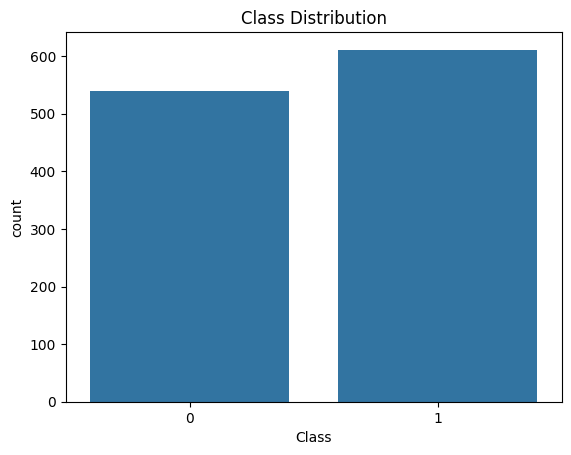

In [8]:
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

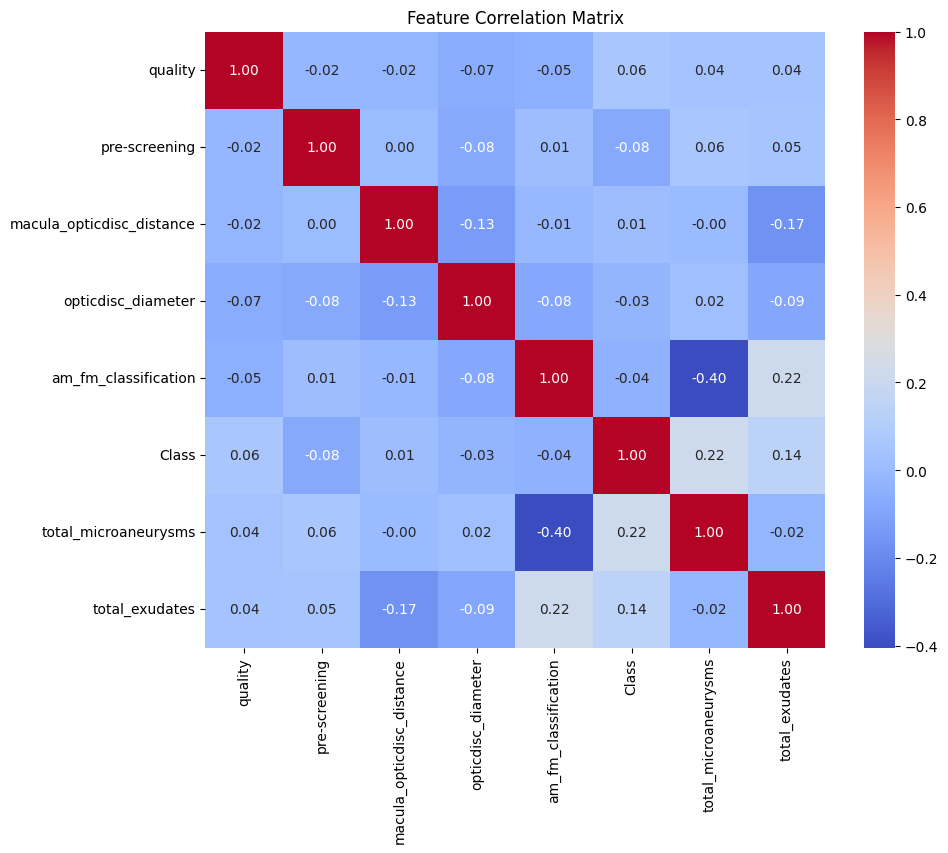

In [9]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_engineered.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

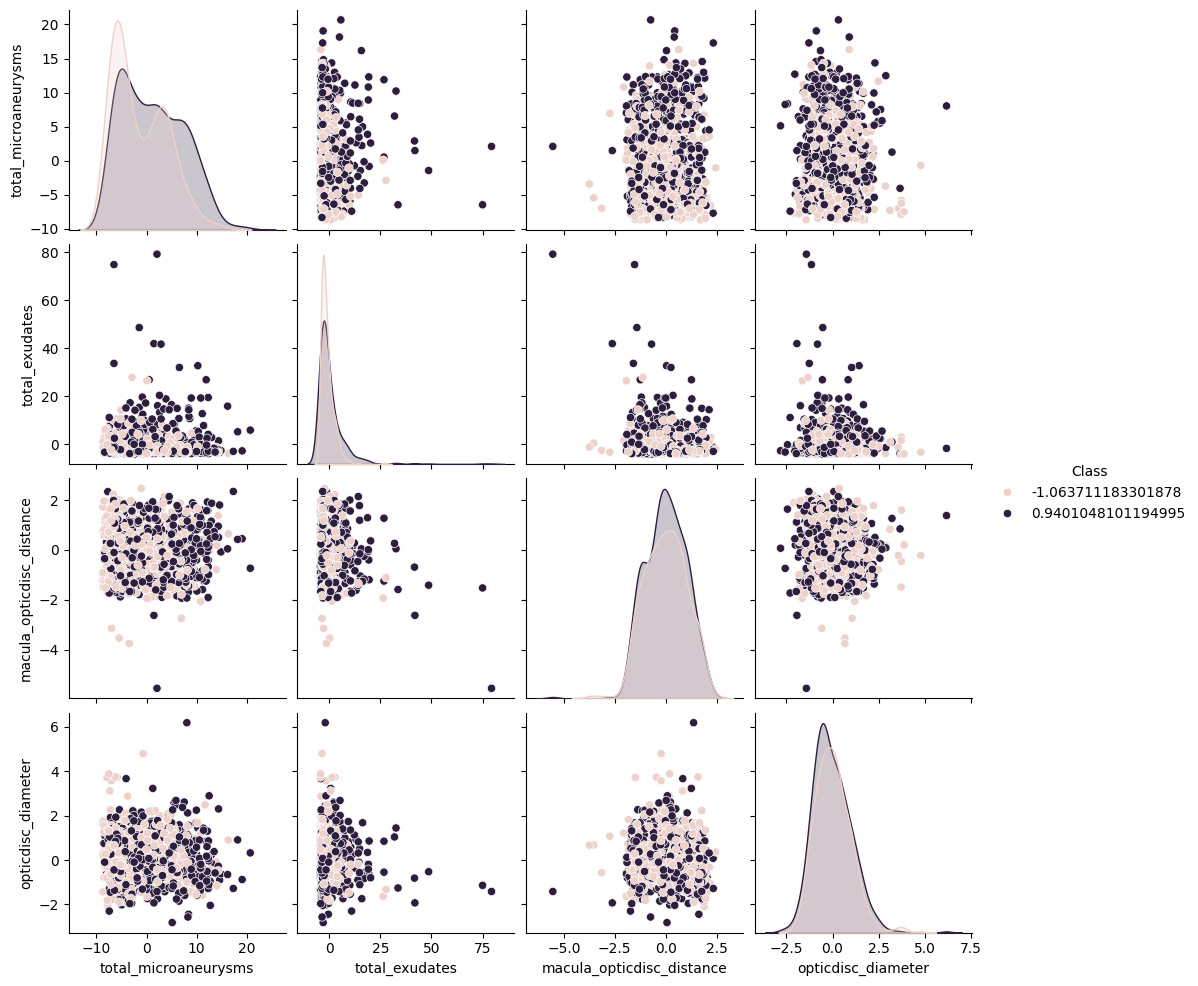

In [10]:
sns.pairplot(data=data_engineered, hue='Class', vars=['total_microaneurysms', 'total_exudates', 'macula_opticdisc_distance', 'opticdisc_diameter'])
plt.show()

In [11]:
if not all(data['Class'].isin([0, 1])):
    raise ValueError("Target variable `Class` should only contain binary values 0 and 1.")

X = data.drop(columns=['Class'])
y = data['Class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
logreg = LogisticRegression()

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

logreg = LogisticRegression(max_iter=5000, solver='lbfgs', random_state=42)
cv_results = cross_val_score(logreg, X_scaled, y, cv=kfold, scoring='accuracy')
print(f'Cross-Validated Accuracy (10-fold): {cv_results.mean():.4f}')

Cross-Validated Accuracy (10-fold): 0.7229


In [21]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [22]:
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [23]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC Score: {roc_auc:.2f}')

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.77
Precision: 0.85
Recall: 0.70
F1 Score: 0.77
AUC-ROC Score: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76       103
           1       0.85      0.70      0.77       128

    accuracy                           0.77       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.78      0.77      0.77       231



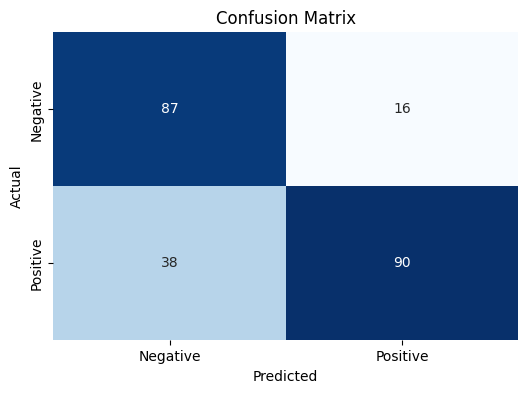

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

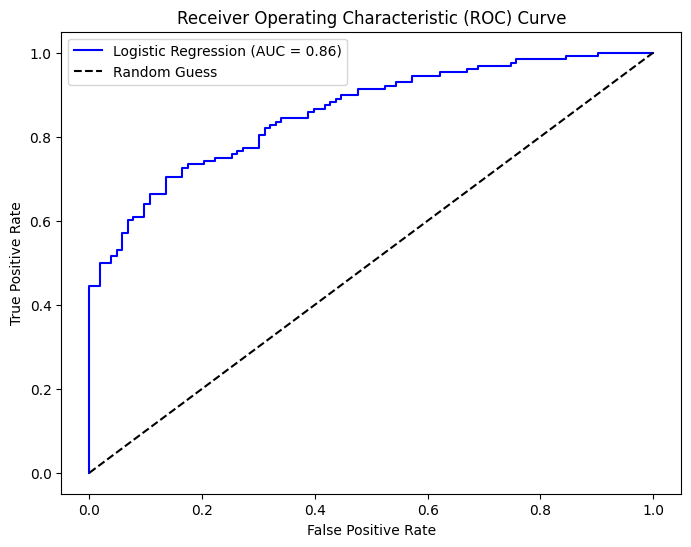

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()